Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article.

To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works:

In [30]:
import pandas as pd
import numpy as np
import requests
import re
import fr_core_news_sm
from bs4 import BeautifulSoup

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy import displacy

import wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt

from PIL import Image

In [31]:
# Requête vers la page Wikipédia
url = "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi"
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Analyse HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraire tous les paragraphes dans un corpus
    corpus = [p.text for p in soup.find_all("p")]
    
    # Afficher le premier paragraphe
    print("Premier paragraphe extrait :\n")
    print(corpus[0] if corpus else "Aucun contenu trouvé.")
else:
    print(f"Erreur lors de la requête : {response.status_code}")

Premier paragraphe extrait :

Pour les articles homonymes, voir Obi-Wan Kenobi (homonymie).



We need to install spacy modules corresponding to the language specifics (in this case French). So install en_core_news_sm.

Feel free to help you with documentation: English

Since text is in french, import now fr_core_news_sm --> Documentation

In [32]:
# Charger le modèle de langue francaise
nlp = spacy.load("fr_core_news_sm")

For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of :

join()

strip()

Make some basic cleanings :

remove special characters

make sure there are no uppercase

In [33]:
# Supprimer les espaces superflus dans chaque paragraphe
stripped_corpus = [text.strip() for text in corpus]

# Fusionner tous les paragraphes en une seule chaîne
clean_corpus = " ".join(stripped_corpus)

# Supprimer la ponctuation et convertir en minuscules
clean_corpus = re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", clean_corpus).lower()

# Afficher les 100 premiers caractères
print(f"{clean_corpus[:100]}...")

pour les articles homonymes voir obiwan kenobi homonymie personnage de fiction apparaissant dansstar...


Now load your clean corpus in a doc object.

In [34]:
doc = nlp(clean_corpus)

In [35]:
# Print stop words
print(fr_stop)

{'mille', 'houp', 'basee', 'sent', 'va', 'précisement', "m'", 'aie', 'surtout', 'néanmoins', 'lorsque', 'as', "t'", 'nombreux', 'relative', 'seront', 'apres', 'vers', 'moi', 'retour', 'quarante', 'ait', 'gens', 'toi-même', 'hi', 'ne', 'sous', 'plutot', 'hep', 'dixième', 'ce', 'quelques', 'durant', 'son', 'ho', 'lesquelles', 'pu', 'dire', 'mêmes', 'differentes', 'tienne', 'désormais', 'douzième', 'toute', 'environ', 'jusqu', 'au', 'font', 'qu’', 'est', 'sixième', 'suivante', 'deja', 'tous', 'diverses', 'revoilà', 'ès', 'jusque', 'différente', 'je', 'pendant', 'quels', 'vas', 'outre', 'avant', 'notamment', 'douze', 'déjà', 'tu', 'à', 'antérieure', 'quand', 'o', 'ni', 'y', 'vé', 'déja', 'quatorze', 'eu', 'ouverte', 'voici', 'vous-mêmes', 'desquelles', 'tant', 'unes', 'cinq', 'merci', 'moins', 'celle', 'celle-ci', 'avec', 'differents', 'malgré', 'feront', 'duquel', 'ceci', 'antérieures', 'sienne', 'suivants', 'ceux-ci', 'seules', 'combien', 'different', 'seize', 'sa', "d'", 'elles', 'compr

With the wordcloud library, create a first word cloud

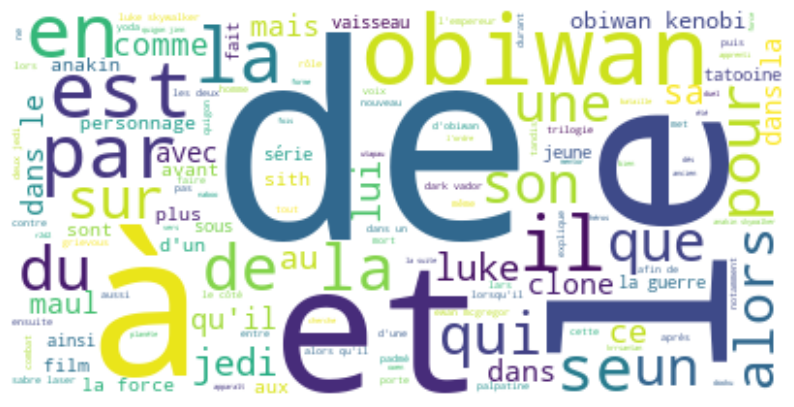

In [36]:
# Instancier le WordCloud avec les paramètres
wd = WordCloud(
    background_color="white",     # Couleur de fond
    contour_width=1,              # Largeur du contour
    contour_color="steelblue",    # Couleur du contour
)

# Générer le WordCloud
cloud = wd.generate(doc.text)

# Afficher le WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")  # Supprimer les axes
plt.show()

In [39]:
# Visualiser les 10 premiers mots
print("Les 10 premiers mots vides en français :")
for i, word in enumerate(fr_stop):
    if i < 10:
        print(word)
    else:
        break

Les 10 premiers mots vides en français :
mille
houp
basee
sent
va
précisement
m'
aie
surtout
néanmoins


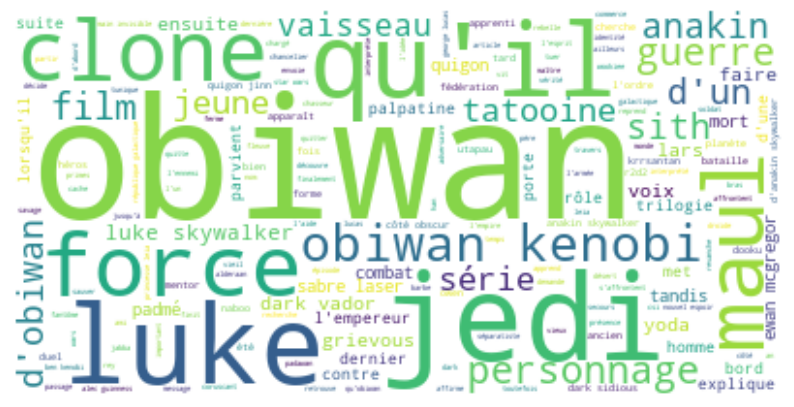

In [40]:
# Instancier le WordCloud avec les paramètres
wd = WordCloud(
    stopwords=fr_stop,
    background_color="white",     # Couleur de fond
    contour_width=1,              # Largeur du contour
    contour_color="steelblue",    # Couleur du contour
)

# Générer le WordCloud
cloud = wd.generate(doc.text)

# Afficher le WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")  # Supprimer les axes
plt.show()

We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

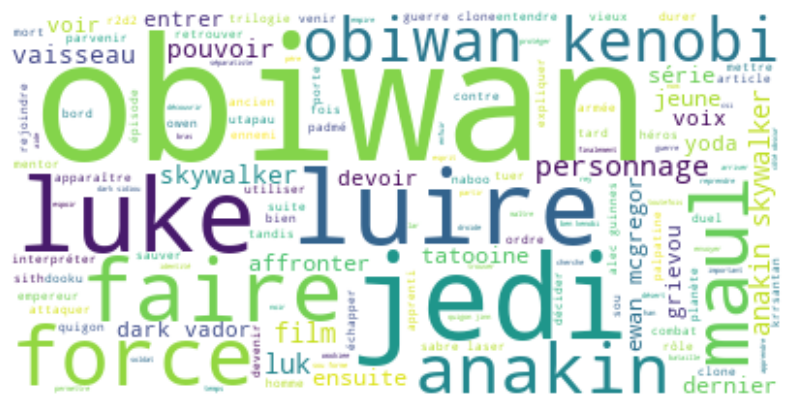

In [41]:
# Lemmatisation et suppression des stop words
lemma = [token.lemma_ for token in doc if token.lemma_.lower() not in fr_stop]

# Créer un nouveau corpus basé sur les lemmes
corpus_lemma = " ".join(lemma)

# Instancier le WordCloud
wd = WordCloud(
    background_color="white",
    contour_width=1,
    contour_color="steelblue",
    stopwords=fr_stop
)

# Générer le WordCloud à partir du corpus lemmatisé
cloud = wd.generate(corpus_lemma)

# Visualiser le WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Let's push analysis further! Some words are really common in our corpus, find which of them

In [42]:
# Créer une série Pandas à partir des lemmes
lemmadf = pd.Series(lemma)

# Calculer la fréquence des lemmes et créer un masque pour les termes fréquents
common = lemmadf.value_counts() > 15

# Appliquer le masque pour conserver uniquement les termes fréquents
common = common[common]

# Visualiser les 10 premiers termes fréquents
print("Les 10 termes fréquents :")
print(common[:10])

Les 10 termes fréquents :
obiwan       True
             True
jedi         True
luire        True
luke         True
anakin       True
skywalker    True
faire        True
kenobi       True
force        True
Name: count, dtype: bool
